## Multiple Linear Regression

In [123]:
# Import the libraries and set the random seed
from torch import nn
import torch
torch.manual_seed(1)

In [124]:
# Set the weight and bias
w = torch.tensor([[2.0], [3.0]], requires_grad=True)
b = torch.tensor([[1.0]], requires_grad=True)

In [125]:
# Define Prediction Function
def forward(x):
  yhat = torch.mm(x, w) + b
  return yhat

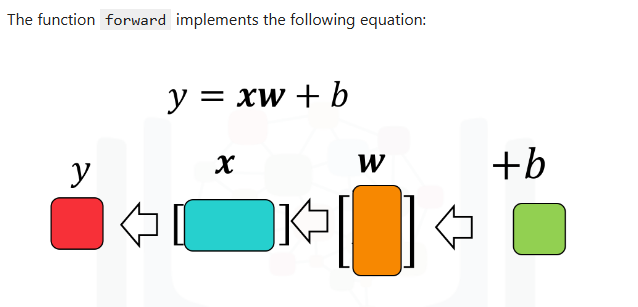

In [126]:
# Calculate yhat
x = torch.tensor([[1.0, 2.0]])
yhat = forward(x)
print("the result: ", yhat)

the result:  tensor([[9.]], grad_fn=<AddBackward0>)


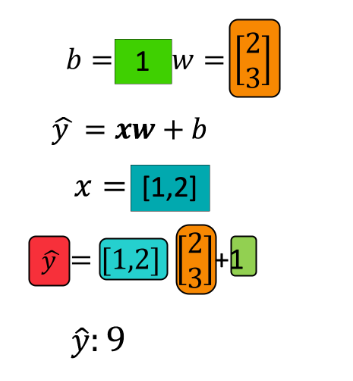

In [127]:
# Sample tensor X
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]])
yhat = forward(X)
print("the result: ", yhat)

the result:  tensor([[ 6.],
        [ 9.],
        [12.]], grad_fn=<AddBackward0>)


## Class Linear

In [128]:
# Make a linear regression model using build-in function
model = nn.Linear(2, 1)

In [129]:
# Make a prediction of x
yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.3969]], grad_fn=<AddmmBackward0>)


In [130]:
# Make a prediction of X
yhat = model(X)
print("the result: ", yhat)

the result:  tensor([[-0.0848],
        [-0.3969],
        [-0.7090]], grad_fn=<AddmmBackward0>)


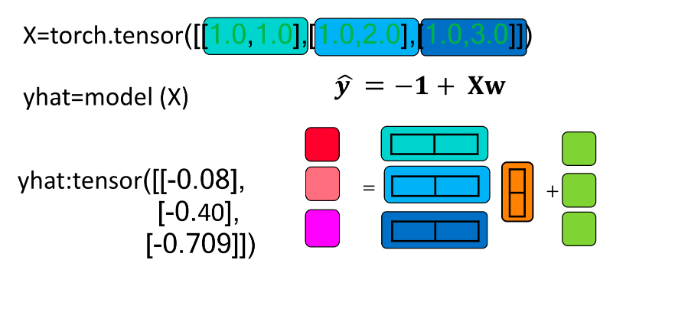

## Build Custom Modules

In [131]:
# Create linear_regression Class
class linear_regression(nn.Module):

  # Constructor
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction function
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [132]:
model = linear_regression(2, 1)

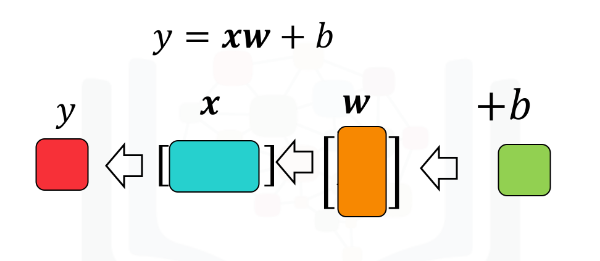

In [133]:
# Print model parameters
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.3319, -0.6657]], requires_grad=True), Parameter containing:
tensor([0.4241], requires_grad=True)]


In [134]:
# Print model parameters
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict([('linear.weight', tensor([[ 0.3319, -0.6657]])), ('linear.bias', tensor([0.4241]))])


In [135]:
# Make a prediction of x
x = torch.tensor([[1.0, 2.0]])
yhat = model(x)
print("The result: ", yhat)

The result:  tensor([[-0.5754]], grad_fn=<AddmmBackward0>)


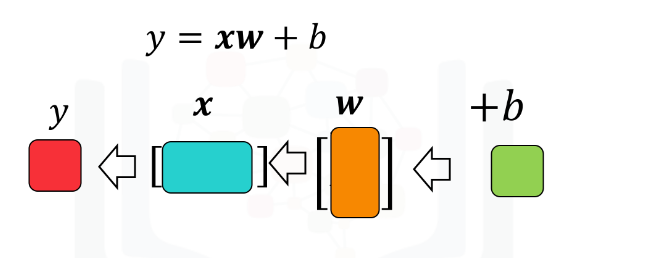

In [136]:
# Make a prediction of X
yhat = model(X)
print("The result: ", yhat)

The result:  tensor([[ 0.0903],
        [-0.5754],
        [-1.2411]], grad_fn=<AddmmBackward0>)


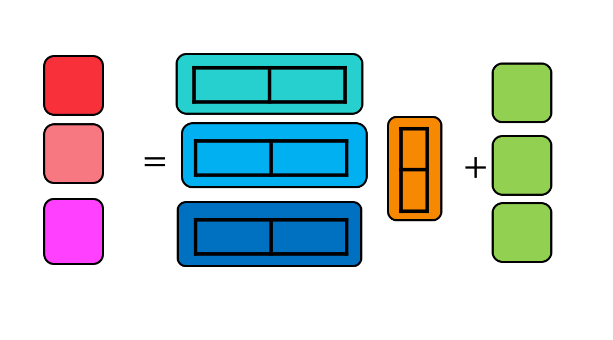

In [137]:
# Practice: Build a model to predict the follow tensor.

X = torch.tensor([[11.0, 12.0, 13, 14], [11, 12, 13, 14]])
model = linear_regression(4, 1)
yhat = model(X)
print("The parameters: ", model.state_dict())
print("The parameters: ", list(model.parameters()))
print("The result: ", yhat)

The parameters:  OrderedDict([('linear.weight', tensor([[-0.1029,  0.2544,  0.0695, -0.0612]])), ('linear.bias', tensor([0.1387]))])
The parameters:  [Parameter containing:
tensor([[-0.1029,  0.2544,  0.0695, -0.0612]], requires_grad=True), Parameter containing:
tensor([0.1387], requires_grad=True)]
The result:  tensor([[2.1062],
        [2.1062]], grad_fn=<AddmmBackward0>)


## Linear Regression Multiple Outputs

In [138]:
# Import the libraries we need for this lab
from torch import optim, nn
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [139]:
# Set the random seed to 1.
torch.manual_seed(1)

In [140]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot

    ax.plot_surface(X, Y, yhat) # Plane plot

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [141]:
# Create a 2D dataset
class Data2D(Dataset):

  # constructor
  def __init__(self):
    self.x = torch.zeros(20, 2)
    self.x[:, 0] = torch.arange(-1.0, 1.0, 0.1)
    self.x[:, 1] = torch.arange(-1.0, 1.0, 0.1)
    self.w = torch.tensor([[1.0], [1.0]])
    self.b = 1
    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
    self.len = self.x.shape[0]

  # Getter
  def __getitem__(self, index):
    return self.x[index], self.y[index]

  # Get Length
  def __len__(self):
    return self.len

In [142]:
# Create the dataset object
dataset = Data2D()

## Create the Model, Optimizer, and Total Loss Function (Cost)

In [143]:
# Create a customized linear
class linear_regression(nn.Module):

  # constructor
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  # Prediction
  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [144]:
# Create the linear regression model and print the parameters
model1 = linear_regression(2, 1)
print("The Parameters: ", model1.state_dict())
print("The Parameters: ", list(model1.parameters()))

The Parameters:  OrderedDict([('linear.weight', tensor([[ 0.6209, -0.1178]])), ('linear.bias', tensor([0.3026]))])
The Parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


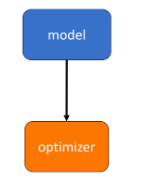

In [145]:
# Create the optimizer
optimizer = optim.SGD(model1.parameters(), lr=0.1)

In [146]:
# Create the cost function
criterion = nn.MSELoss()

In [147]:
# Create the data loader
train_loader = DataLoader(dataset=dataset, batch_size=2)

## Train the Model via Mini-Batch Gradient Descent

Before Training...


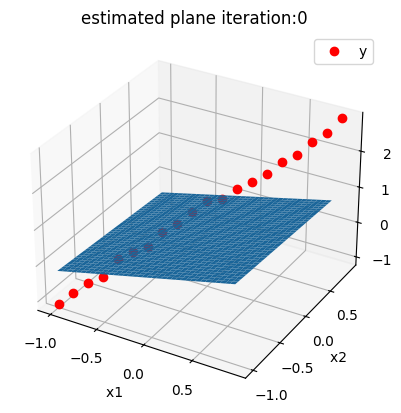

After Training...


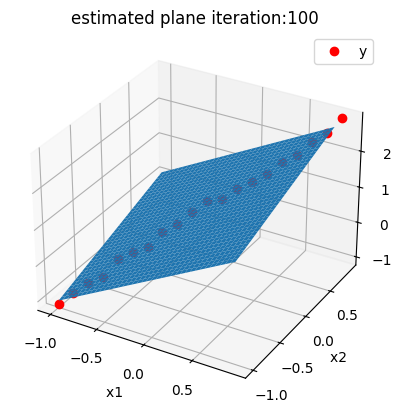

In [148]:
# Train the model
LOSS1 = []
print("Before Training...")
Plot_2D_Plane(model1, dataset)
epochs = 100

def train_model1(epochs):
  for epoch in range(epochs):
    for x, y in train_loader:
      yhat = model1(x)
      loss = criterion(yhat, y)
      LOSS1.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model1(epochs)
print("After Training...")
Plot_2D_Plane(model1, dataset, epochs)

Text(0, 0.5, 'Cost/total loss')

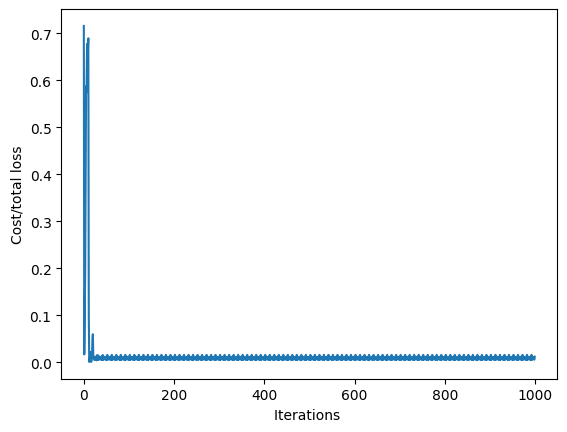

In [149]:
# Plot out the Loss and iteration diagram
plt.plot(LOSS1)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss")

Result before training


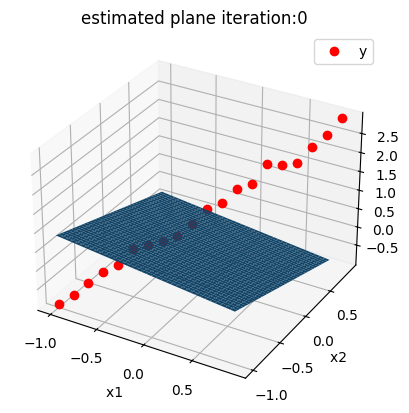

Result After training


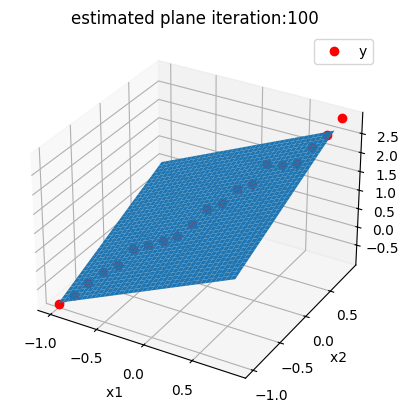

In [150]:
# Practice create model1. Train the model with batch size 10 and learning rate 0.1, store the loss in a list <code>LOSS1</code>. Plot the results.
dataset = Data2D()
train_loader = DataLoader(dataset=dataset, batch_size=10)
model2 = linear_regression(2, 1)
optimizer = optim.SGD(model2.parameters(), lr=0.1)
LOSS2 = []
print("Result before training")
Plot_2D_Plane(model2, dataset)
epochs = 100

def train_model2(epochs):
  for epoch in range(epochs):
    for x, y in train_loader:
      yhat = model2(x)
      loss = criterion(yhat, y)
      LOSS2.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

train_model2(epochs)
print("Result After training")
Plot_2D_Plane(model2, dataset, epochs)

Text(0, 0.5, 'Cost/total loss')

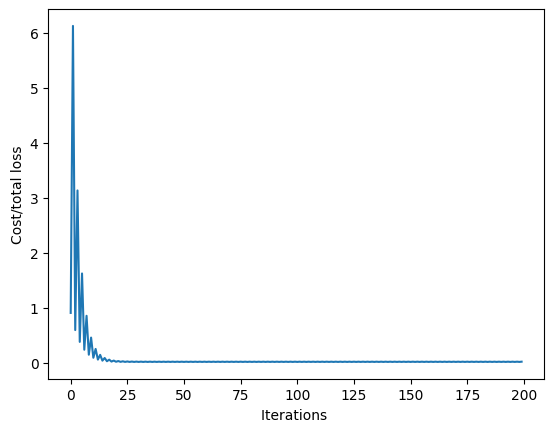

In [151]:
plt.plot(LOSS2)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss")

In [152]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y
X = validation_data.x

yhat_model1 = model1(X)
yhat_model2 = model2(X)
loss_model1 = criterion(yhat_model1, Y)
loss_model2 = criterion(yhat_model2, Y)
print(f"Model 1 Loss: {loss_model1}")
print(f"Model 2 Loss: {loss_model2}")

Model 1 Loss: 0.008103539235889912
Model 2 Loss: 0.010702088475227356


In [1]:
from torch import nn
import torch

In [2]:
torch.manual_seed(1)

In [5]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [6]:
model = linear_regression(1, 10)
model(torch.tensor([1.0]))

tensor([ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
         1.0132,  0.1887], grad_fn=<ViewBackward0>)

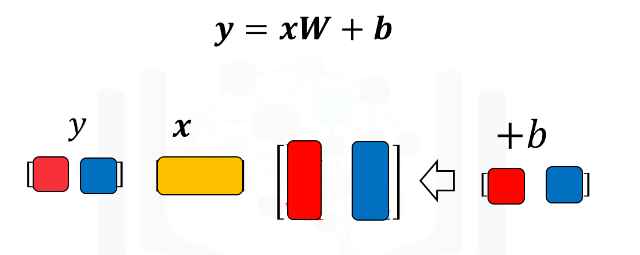

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5153],
         [-0.4414],
         [-0.1939],
         [ 0.4694],
         [-0.9414],
         [ 0.5997],
         [-0.2057],
         [ 0.5087],
         [ 0.1390],
         [-0.1224]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
          0.8742,  0.3112], requires_grad=True)]

In [8]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.5153],
                      [-0.4414],
                      [-0.1939],
                      [ 0.4694],
                      [-0.9414],
                      [ 0.5997],
                      [-0.2057],
                      [ 0.5087],
                      [ 0.1390],
                      [-0.1224]])),
             ('linear.bias',
              tensor([ 0.2774,  0.0493,  0.3652, -0.3897, -0.0729, -0.0900,  0.1449, -0.0040,
                       0.8742,  0.3112]))])

In [9]:
x = torch.tensor([[1.0]])
x

tensor([[1.]])

In [10]:
yhat = model(x)
yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887]], grad_fn=<AddmmBackward0>)

In [11]:
x = torch.tensor([[1.0], [2.0], [3.0]])
x

tensor([[1.],
        [2.],
        [3.]])

In [13]:
yhat = model(x)
yhat

tensor([[ 0.7926, -0.3920,  0.1714,  0.0797, -1.0143,  0.5097, -0.0608,  0.5047,
          1.0132,  0.1887],
        [ 1.3079, -0.8334, -0.0225,  0.5490, -1.9558,  1.1094, -0.2665,  1.0135,
          1.1522,  0.0663],
        [ 1.8232, -1.2748, -0.2164,  1.0184, -2.8972,  1.7091, -0.4722,  1.5222,
          1.2912, -0.0561]], grad_fn=<AddmmBackward0>)

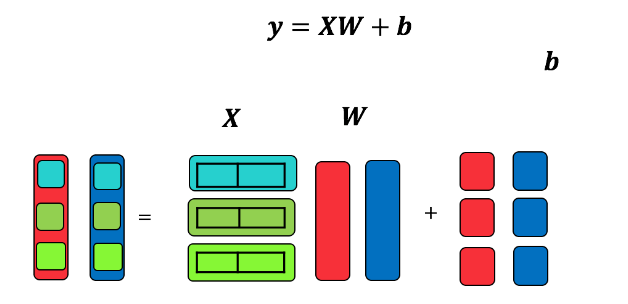

## Linear Regression Multiple Outputs

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [32]:
torch.manual_seed(1)

In [33]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
  def __init__(self):
    self.x = torch.zeros(20, 2)
    self.x[:, 0] = torch.arange(-1.0, 1.0, 0.1)
    self.x[:, 1] = torch.arange(-1.0, 1.0, 0.1)
    self.w = torch.tensor([[1.0, -1.0], [1.0, 3.0]])
    self.b = torch.tensor([[1.0, -1.0]])
    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f + 0.001 * torch.randn((self.x.shape[0], 1))
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [34]:
dataset = Data()

## Create the Model, Optimizer, and Total Loss Function (cost)

In [35]:
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [36]:
model = linear_regression(2, 2)

In [37]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [38]:
criterion = nn.MSELoss()

In [39]:
trainloader = DataLoader(dataset=dataset, batch_size=5)

## Train the Model via Mini-Batch Gradient Descent

In [40]:
LOSS1 = []
epochs = 100

def train_model(epochs):
  for epoch in range(epochs):
    for x, y in trainloader:
      #make a prediction
      yhat = model(x)
      #calculate the loss
      loss = criterion(yhat, y)
      #store loss/cost
      LOSS1.append(loss.item())
      #clear gradient
      optimizer.zero_grad()
      #Backward pass: compute gradient of the loss with respect to all the learnable parameters
      loss.backward()
      #the step function on an Optimizer makes an update to its parameters
      optimizer.step()
train_model(epochs)

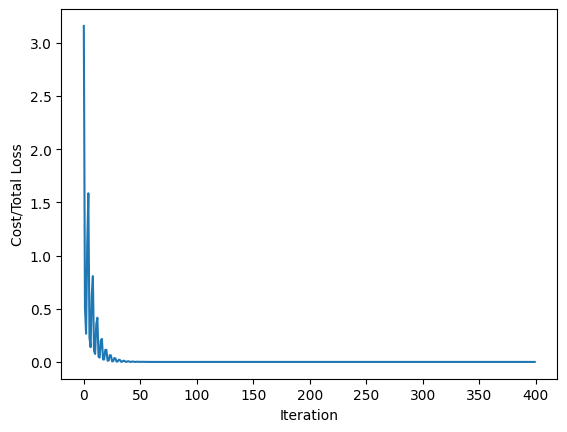

In [41]:
plt.plot(LOSS1)
plt.xlabel("Iteration")
plt.ylabel("Cost/Total Loss")
plt.show()